In [0]:
import numpy as np
from numpy import random
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

# **Изучение зависимости роста числа обусловленности случайной матрицы от ее порядка**

Для начала создадим функцию, вычисляющую манхеттенское число обусловленности матрицы:

In [0]:
def cond(A):
    return linalg.norm(A, 1)*linalg.norm(linalg.inv(A), 1)

Будем генерировать матрицы порядков от 1 до ```max```.

In [0]:
max=100
n_vector = np.arange(1, max+1)

Построим график зависимости числа обусловленности от порядка матрицы со случайными элементами, распределенными по нормальному закону с математическим ожиданием 0 и средним квадратическим отклонением 1.

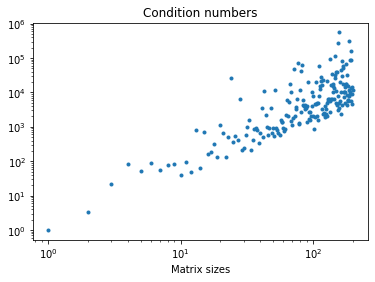

In [146]:
cond_array = []
for n in n_vector:
  A=random.randn(n,n)
  cond_array.append(cond(A))
plt.title("Condition numbers")
plt.xlabel("Matrix sizes")
plt.loglog(n_vector,cond_array,'.')
pass


По графику видно, что большинство точек как бы лежат между двумя прямыми. Так как используем двойную логарифмическую шкалу, прямые являются графиками показательных функций от $n$. То есть, в среднем, $cond_1A_n$ растет как показательная функция от $n$. Подберем такие $ c_1, c_2, p, $ что для большинства матриц $$c_1n^p \le cond_1A_n \le c_2n^p $$
Коэффициенты $c_1$ и $c_2$ отвечают за смещение прямых вдоль оси ординат. Коэффициент $p$ - за угол наклона.

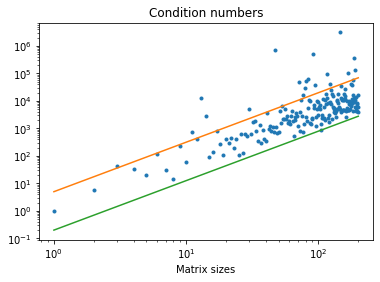

In [147]:
c1=5
c2=0.2
p=1.8
l1=c1*(n_vector**p)
l2=c2*(n_vector**p)
cond_array = []
for n in n_vector:
  A=random.randn(n,n)
  cond_array.append(cond(A))
plt.title("Condition numbers")
plt.xlabel("Matrix sizes")
plt.loglog(n_vector,cond_array,'.')
plt.loglog(n_vector,l1)
plt.loglog(n_vector,l2)
pass